<a href="https://colab.research.google.com/github/LaurentLabine/fcc_data_analysis_python/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

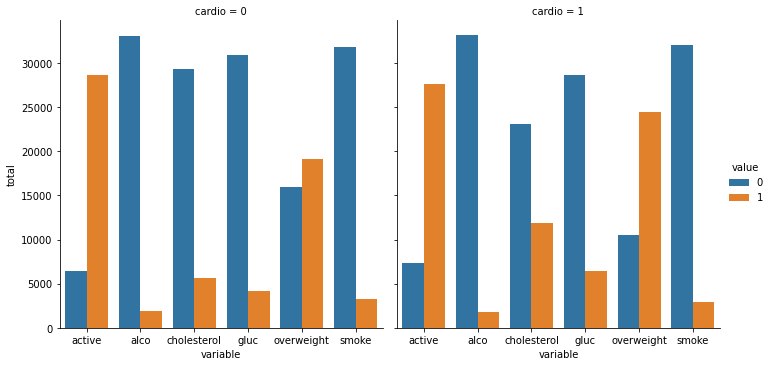

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

data_url = "https://raw.githubusercontent.com/LaurentLabine/fcc_data_analysis_python/main/medical_examination.csv"
# Import data
df = pd.read_csv(data_url)
# print(df)
# Add 'overweight' column
df['overweight'] = (df['weight']/((df['height']/100)**2) >= 25).astype(int)
df['gluc'] = (df['gluc']> 1 ).astype(int)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

pd.set_option('display.max_columns', None)
cardioDataFrame0 = df[df['cardio'] == 0]
cardioDataFrame1 = df[df['cardio'] == 1]

#https://forum.freecodecamp.org/t/medical-data-visualizer-help/437740

df_cat = df.melt(id_vars=['cardio'],value_vars=["active","alco","cholesterol","gluc","overweight","smoke"])
df_cat = df_cat.groupby(['cardio','variable','value'])['value'].count().reset_index(name='total')

fig=sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')
fig.set_xticklabels(['active','alco','cholesterol','gluc','overweight','smoke'])

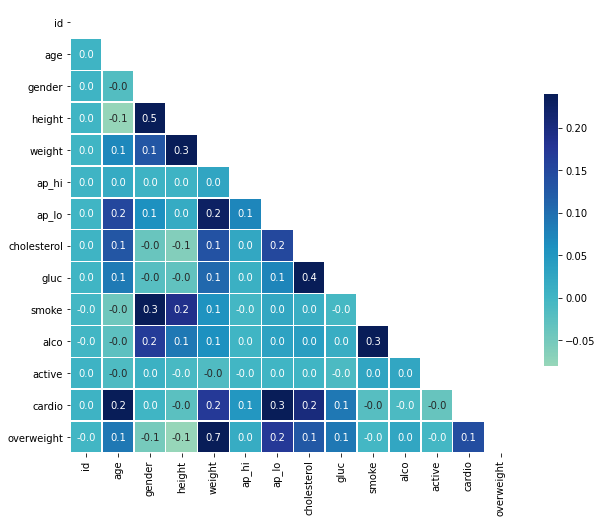

In [ ]:
# Clean the data. Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

#print(df)

df1 = df.loc[(df["ap_lo"] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

#print(df1)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.24, vmin= -0.08, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax, fmt='.1f')

# Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.



In [ ]:
ax = sns.barplot(x="variable", y="total", hue="sex", data=tips)

In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig